In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HoytHall_session1_group1_2025-05-07_13-12-41.csv")

In [3]:
# Convert time to datetime
# the time is in different time zone (standard time)
df['Time'] = pd.to_datetime(df['Time'], unit='s')

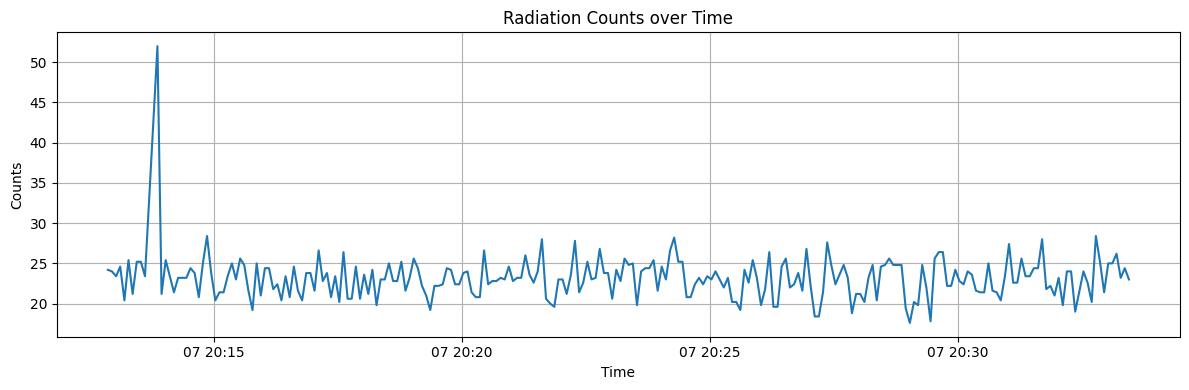

In [4]:
# Radiation Counts
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['counts'], label='Radiation Counts')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Radiation Counts over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

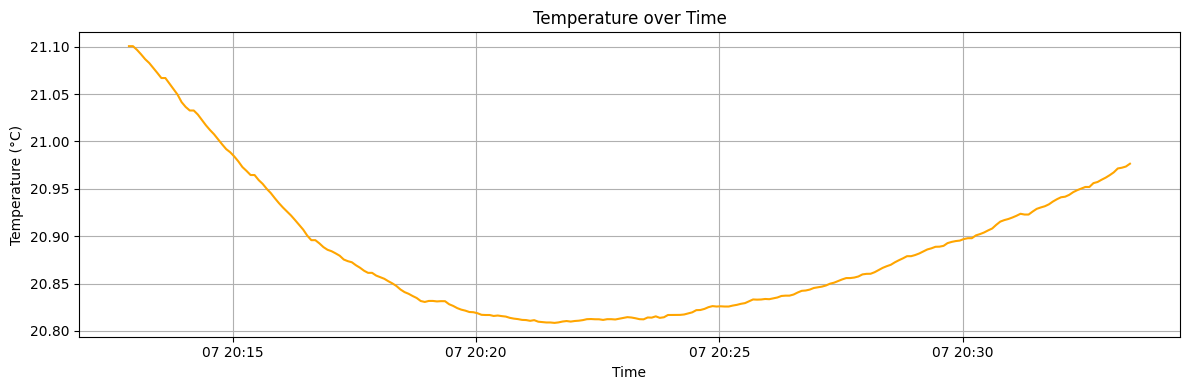

In [5]:
# Temperature
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['Temperature'], label='Temperature (°C)', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

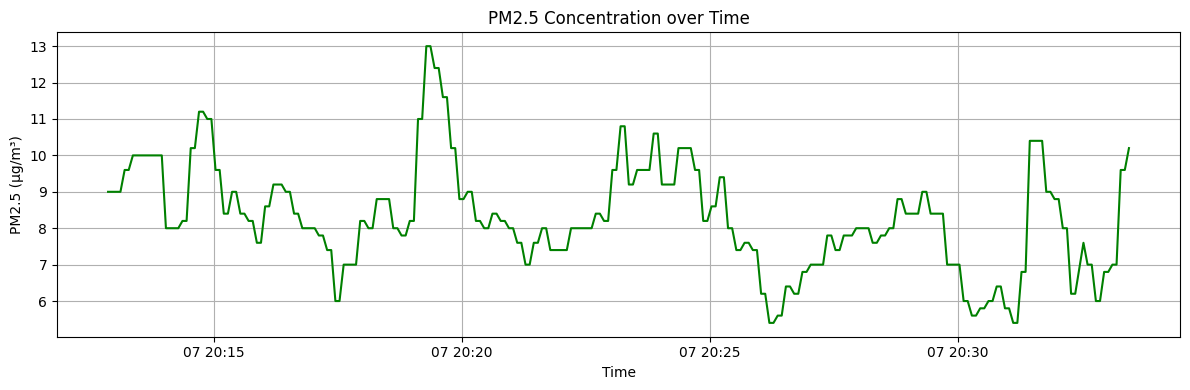

In [6]:
# Plot PM2.5
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['PM25'], label='PM2.5 (µg/m³)', color='green')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Concentration over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
print(df.columns)


Index(['Time', 'Latitude', 'Longitude', 'counts', 'PM1', 'PM25', 'PM10',
       'Temperature', 'Humidity', 'Pressure', 'Altitude', 'VOC'],
      dtype='object')


counts - Mean: 23.18, Standard Deviation: 2.81


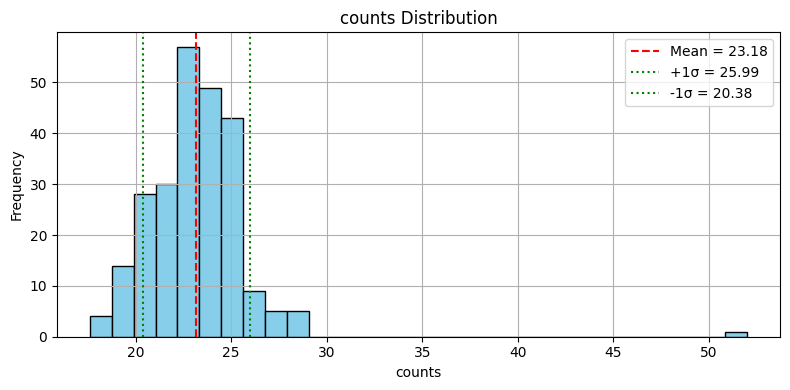

Temperature - Mean: 20.88, Standard Deviation: 0.07


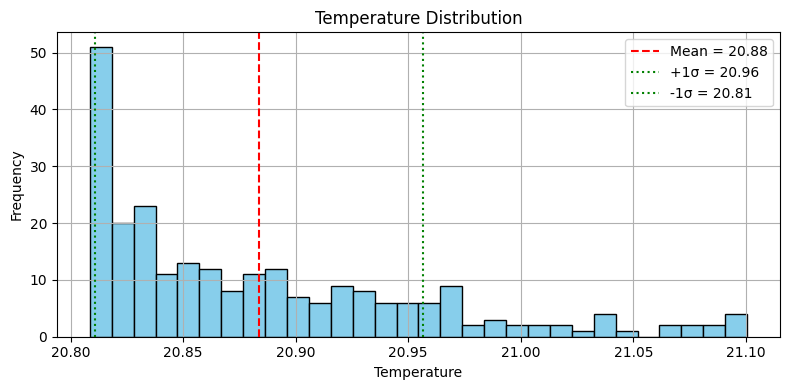

PM25 - Mean: 8.27, Standard Deviation: 1.45


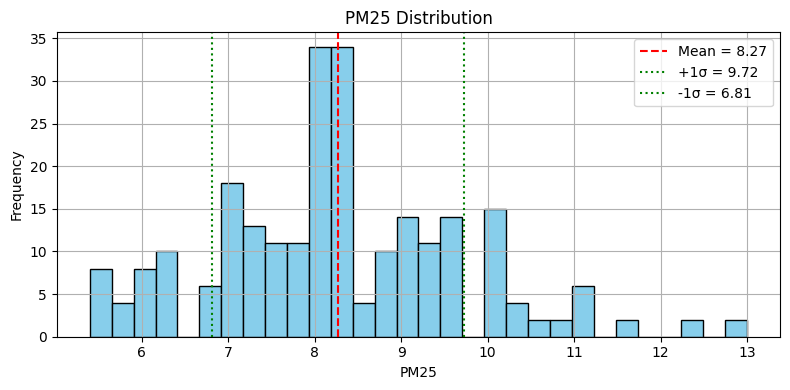

In [8]:
# Plot histograms and compute mean + standard deviation
variables = ['counts', 'Temperature', 'PM25']

for var in variables:
    mean_val = df[var].mean()
    std_val = df[var].std()
    print(f"{var} - Mean: {mean_val:.2f}, Standard Deviation: {std_val:.2f}")
    
    plt.figure(figsize=(8, 4))
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color='green', linestyle='dotted', linewidth=1.5, label=f'+1σ = {mean_val + std_val:.2f}')
    plt.axvline(mean_val - std_val, color='green', linestyle='dotted', linewidth=1.5, label=f'-1σ = {mean_val - std_val:.2f}')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [9]:
import numpy as np

# Compare expected vs. measured standard deviation for counts

# Counts data
mean_counts = df['counts'].mean()
std_measured = df['counts'].std()
n_samples = len(df)

# Expected standard deviation from counting statistics
std_expected = np.sqrt(mean_counts)

# Uncertainty on measured std dev using CLT
uncertainty_std = std_expected / np.sqrt(2 * np.sqrt(n_samples))

print(f"Mean Counts (N): {mean_counts:.2f}")
print(f"Expected Std Dev (√N): {std_expected:.2f}")
print(f"Measured Std Dev: {std_measured:.2f}")
print(f"Uncertainty on Measured Std Dev: ±{uncertainty_std:.2f}")

if abs(std_measured - std_expected) <= uncertainty_std:
    print("→ The measured and expected standard deviations are in statistical agreement.")
else:
    print("→ The measured and expected standard deviations are NOT in statistical agreement.")


Mean Counts (N): 23.18
Expected Std Dev (√N): 4.81
Measured Std Dev: 2.81
Uncertainty on Measured Std Dev: ±0.86
→ The measured and expected standard deviations are NOT in statistical agreement.


In [10]:
# Round latitude and longitude
df['LatLng'] = df['Latitude'].round(5).astype(str) + "," + df['Longitude'].round(5).astype(str)

# Group
location_stats = df.groupby('LatLng')['counts'].agg(['mean', 'std', 'count']).reset_index()
location_stats['sem'] = location_stats['std'] / np.sqrt(location_stats['count'])

# Display locations and stats
print("Radiation by Location")
for _, row in location_stats.iterrows():
    print(f"Location {row['LatLng']}: Mean = {row['mean']:.2f}, SEM = ±{row['sem']:.2f}")


Radiation by Location
Location 37.87625,-122.25979: Mean = 20.40, SEM = ±nan
Location 37.87625,-122.2598: Mean = 25.40, SEM = ±nan
Location 37.87625,-122.25983: Mean = 22.00, SEM = ±0.60
Location 37.87626,-122.25978: Mean = 23.70, SEM = ±0.70
Location 37.87626,-122.2598: Mean = 23.50, SEM = ±0.10
Location 37.87626,-122.25981: Mean = 22.53, SEM = ±0.61
Location 37.87626,-122.25982: Mean = 22.53, SEM = ±1.18
Location 37.87626,-122.25983: Mean = 23.62, SEM = ±0.56
Location 37.87627,-122.25979: Mean = 25.60, SEM = ±nan
Location 37.87627,-122.25981: Mean = 21.98, SEM = ±0.84
Location 37.87627,-122.25982: Mean = 21.56, SEM = ±0.76
Location 37.87627,-122.25983: Mean = 23.22, SEM = ±0.90
Location 37.87627,-122.25984: Mean = 22.00, SEM = ±nan
Location 37.87627,-122.25985: Mean = 22.73, SEM = ±0.55
Location 37.87627,-122.25993: Mean = 25.60, SEM = ±nan
Location 37.87628,-122.25974: Mean = 24.00, SEM = ±nan
Location 37.87628,-122.25975: Mean = 22.00, SEM = ±nan
Location 37.87628,-122.25976: Mean 

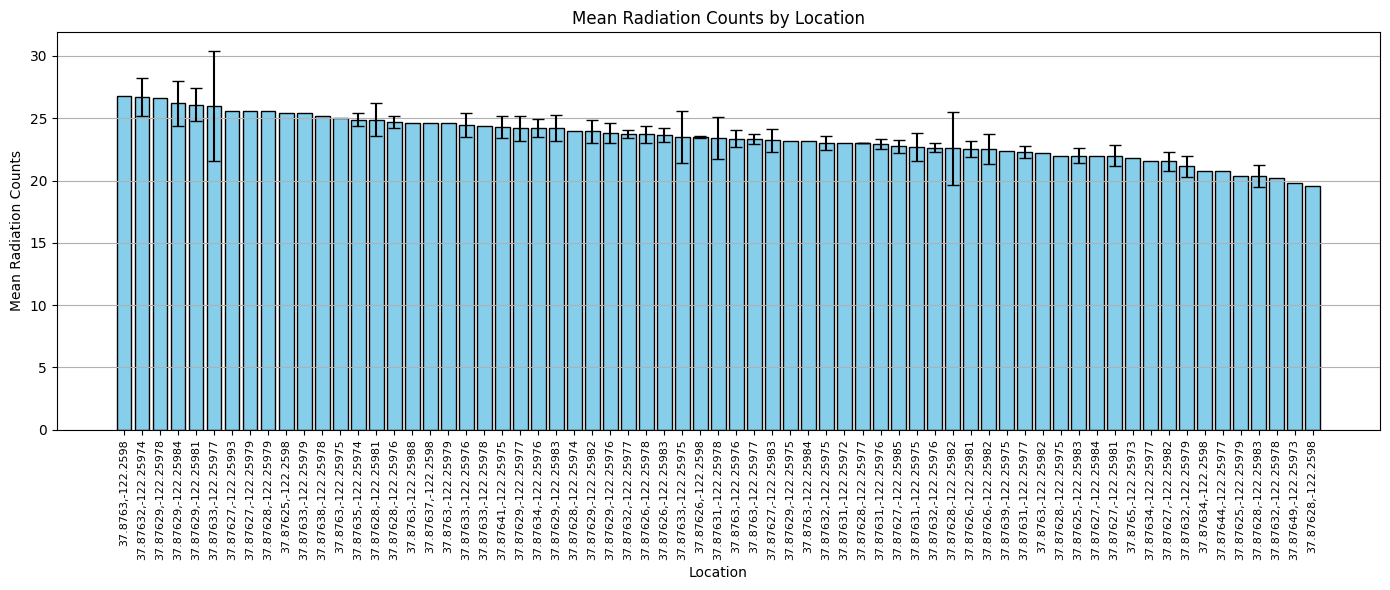

In [11]:
# Sort locations by mean counts for readability
location_stats_sorted = location_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(location_stats_sorted['LatLng'], location_stats_sorted['mean'], yerr=location_stats_sorted['sem'],
        capsize=4, color='skyblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Location')
plt.ylabel('Mean Radiation Counts')
plt.title('Mean Radiation Counts by Location')
plt.tight_layout()
plt.grid(axis='y')
plt.show()